<h2> 1. Data Cleaning </h2>

In [1]:
DATAPOINTS = 112357#number of datapoints to consider

In [2]:
import pandas as pd
df = pd.read_csv('file1.csv',nrows = DATAPOINTS)

<h3> 1.1 finding duplicate rows and removing them </h3>

In [3]:
print("number of duplicated rows",len(df[df.duplicated()]))

number of duplicated rows 0


In [4]:
#drop duplictes
df.drop_duplicates(keep='first')

,Id,Title,Body
0,405165,"Please advise on Ruby vs Python, for someone w...","<p>I am a C++ developer, slowly getting into w..."
1,405548,C# - are all Enum constants?,<p>Are all Enum enumerations constants? Do the...
2,405770,Why are compilers so stupid?,<p>I always wonder why compilers can't figure ...
3,406016,UI Terminology: Logon vs Login,<p>I am crafting an application and cannot dec...
4,406121,Flattening a shallow list in Python,<p>Is there a simple way to flatten a list of ...
...,...,...,...
104387,72531618,Const correctness of operator* in std::unique_ptr,<p>Why can 'operator*' member function of std:...
104388,72533711,Removing last trailing comma from the argument...,<p>I need to remove the last trailing comma fr...
104389,72561713,Data race guarded by if (false)... what does t...,<p>Consider the following situation</p>\n<pre ...
104390,72568719,"If Python strings are immutable, why does it k...","<p>Strings in Python are immutable, which mean..."


In [5]:
df.head()

,Id,Title,Body
0,405165,"Please advise on Ruby vs Python, for someone w...","<p>I am a C++ developer, slowly getting into w..."
1,405548,C# - are all Enum constants?,<p>Are all Enum enumerations constants? Do the...
2,405770,Why are compilers so stupid?,<p>I always wonder why compilers can't figure ...
3,406016,UI Terminology: Logon vs Login,<p>I am crafting an application and cannot dec...
4,406121,Flattening a shallow list in Python,<p>Is there a simple way to flatten a list of ...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104392 entries, 0 to 104391
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Id      104392 non-null  int64 
 1   Title   104392 non-null  object
 2   Body    104392 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.4+ MB


In [7]:
print('~> Total number of questions :\n   {}'.format(len(df)))

~> Total number of questions :
   104392


<h3> 1.2 Checking whether there are any rows with null values</h3>

In [8]:
nan_rows = df[df.isnull().any(1)]
print (nan_rows)

Empty DataFrame
Columns: [Id, Title, Body]
Index: []


<h3> 1.3 finding max and min length of questions </h3>

In [9]:
s = df['Body'].str.len()
print('Minimum length of the question :',min(s))
print('Maximum length of the question :',max(s))

Minimum length of the question : 32
Maximum length of the question : 41330


In [10]:
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.manifold import TSNE
import nltk
import matplotlib.pyplot as plt
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\victo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

<h3> 1.4 most common words </h3>

In [11]:
stopwords1 = set(STOPWORDS)

Word Cloud for Question 


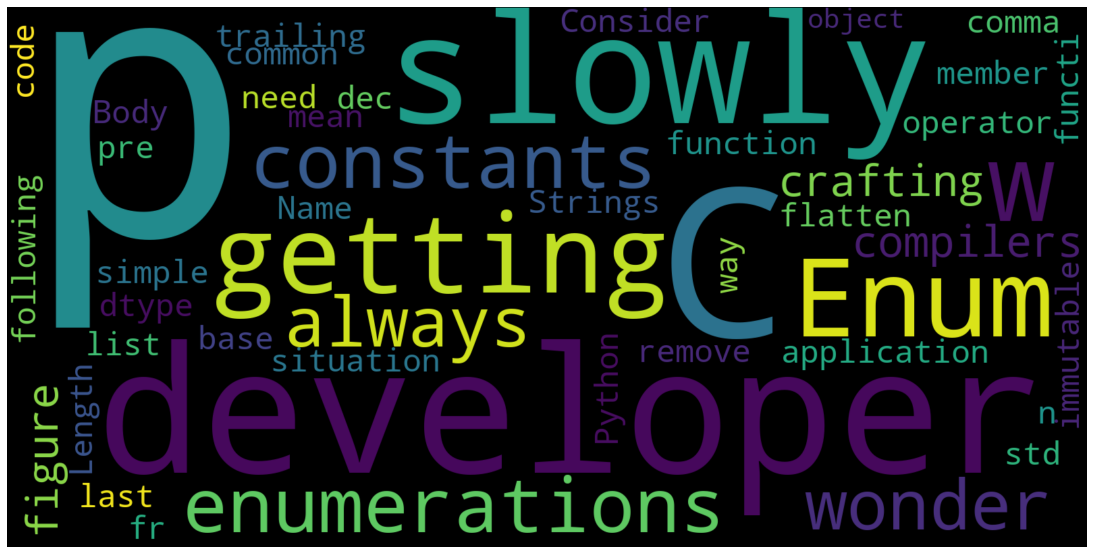

In [12]:
wc = WordCloud(background_color="black", max_words=len(df),width=1600,
                          height=800, stopwords=stopwords1)
wc.generate(str(df["Body"]))
print ("Word Cloud for Question ")
fig = plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

<h2> 2 Cleaning and preprocessing of Questions </h2>

<h3> 2.1 Preprocessing </h3>

<ol> 
    <li> Separate out code-snippets from Body </li>
    <li> Remove Spcial characters from Question title and description (not in code)</li>
    <li> Remove stop words (Except 'C') </li>
    <li> Remove HTML Tags </li>
    <li> Convert all the characters into small letters </li>
    <li> Use SnowballStemmer to stem the words </li>
</ol>

In [13]:
from bs4 import BeautifulSoup
import re
def striphtml(data):
    soup = BeautifulSoup(data, 'lxml')
    cleantext = soup.get_text()
    soup1 = BeautifulSoup(cleantext, 'html5lib')
    cleantext = soup1.get_text()
    cleantext = re.sub('<.*?>', ' ', str(cleantext))  
    cleantext = re.sub('\\n', ' ', str(cleantext))  
    cleantext=re.sub('\sdiv\s', ' ', str(cleantext), flags=re.MULTILINE|re.DOTALL)

    return cleantext
stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer("english")

In [14]:
print(df['Body'][1])
striphtml(df['Body'][1].encode('utf-8'))

<p>Are all Enum enumerations constants? Do they get <strong>converted to their value at compile-time</strong>, or at run-time?</p>



'Are all Enum enumerations constants? Do they get converted to their value at compile-time, or at run-time? '

In [15]:
from tqdm import tqdm

In [16]:
import datetime
from nltk.tokenize import word_tokenize

In [17]:
from datetime import datetime
start = datetime.now()
preprocessed_data_list=[]
preprocessed_data_list_code = []
questions_with_code=0
len_pre=0
len_post=0
questions_proccesed = 0
for row in tqdm(range(len(df))):
    is_code = 0
    title, question = df['Title'][row], df['Body'][row]
    if '<code>' in question:
        questions_with_code+=1
        is_code = 1
    x = len(question)+len(title)

    len_pre+=x

    code = str(re.findall(r'<code>(.*?)</code>', question, flags=re.DOTALL))
    preprocessed_data_list_code.append(code)
    question = re.sub('<code>(.*?)</code>', '', question, flags=re.MULTILINE|re.DOTALL)#keeping the code content
    question=striphtml(question.encode('utf-8'))
    question=str(title)+" "+str(question)

    question=re.sub(r'[^A-Za-z]+',' ',question)
    words= word_tokenize(str(question.lower()))

    #Removing all single letter and and stopwords from question exceptt for the letter 'c'
    question=' '.join(str(stemmer.stem(j)) for j in words if j not in stop_words and (len(j)!=1 or j=='c'))
    preprocessed_data_list.append(question)
    len_post+=len(question)

    questions_proccesed += 1

no_dup_avg_len_pre=(len_pre*1.0)/questions_proccesed
no_dup_avg_len_post=(len_post*1.0)/questions_proccesed

print( "\nAvg. length of questions(Title+Body) before processing: %d"%no_dup_avg_len_pre)
print( "\nAvg. length of questions(Title+Body) after processing: %d"%no_dup_avg_len_post)
print ("\nPercent of questions containing code: %d"%((questions_with_code*100.0)/questions_proccesed))
print("\nTime taken to run this cell :", datetime.now() - start)

  0%|          | 53/104392 [00:00<29:46, 58.39it/s]C:\Users\victo\AppData\Roaming\Python\Python310\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
100%|██████████| 104392/104392 [27:59<00:00, 62.16it/s]


Avg. length of questions(Title+Body) before processing: 1866

Avg. length of questions(Title+Body) after processing: 436

Percent of questions containing code: 81

Time taken to run this cell : 0:27:59.524665


In [18]:
print(len(preprocessed_data_list))
print(len(preprocessed_data_list_code))

104392
104392


<h3> 2.2 sample output of Preprocessing </h3>

In [19]:
k=1
print(df['Body'][k])
print('='*100)
print(preprocessed_data_list[k])

<p>Are all Enum enumerations constants? Do they get <strong>converted to their value at compile-time</strong>, or at run-time?</p>

c enum constant enum enumer constant get convert valu compil time run time


<h3> 2.3 converting preprocessed data into dataframe and storing it as csv </h3>

In [20]:
preprocessed = pd.DataFrame(zip(df['Title'],df['Body'],preprocessed_data_list,preprocessed_data_list_code),columns= ["title","content","questions","code"])

In [21]:
preprocessed.head()

,title,content,questions,code
0,"Please advise on Ruby vs Python, for someone w...","<p>I am a C++ developer, slowly getting into w...",pleas advis rubi vs python someon like lisp lo...,[]
1,C# - are all Enum constants?,<p>Are all Enum enumerations constants? Do the...,c enum constant enum enumer constant get conve...,[]
2,Why are compilers so stupid?,<p>I always wonder why compilers can't figure ...,compil stupid alway wonder compil figur simpl ...,['int x = 0;\nfor (int i = 0; i &lt; 100 * 100...
3,UI Terminology: Logon vs Login,<p>I am crafting an application and cannot dec...,ui terminolog logon vs login craft applic deci...,[]
4,Flattening a shallow list in Python,<p>Is there a simple way to flatten a list of ...,flatten shallow list python simpl way flatten ...,['[image for image in menuitem for menuitem in...


In [22]:
preprocessed.shape

(104392, 4)

In [23]:
preprocessed.to_csv("preprocessed_1.5_lacs.csv",index=False)

<h1>3. Machine Learning Models </h1>

# 3.1 Split the data into test and train  

In [24]:
import pandas as pd

preprocessed = pd.read_csv("preprocessed_1.5_lacs.csv")

In [25]:
preprocessed.shape

(104392, 4)

In [26]:
print(preprocessed.index.values)

[     0      1      2 ... 104389 104390 104391]


In [27]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(preprocessed,test_size=0.05)

In [28]:
print(len(train))
print(len(test))

99172
5220


In [29]:
train.reset_index(inplace = True)
test.reset_index(inplace = True)
print(train.index)
print(test.index)

RangeIndex(start=0, stop=99172, step=1)
RangeIndex(start=0, stop=5220, step=1)


In [30]:
#finding length of each sentences
import numpy as np
def get_wordlen(x):
    return len(x.split())

preprocessed['len'] = preprocessed.questions.apply(get_wordlen)
#reviews = reviews[reviews.len<50]
leng = (preprocessed["len"].values)
print('95%of the questions contains{} words'.format(np.percentile(leng,q = 95)))

95%of the questions contains180.0 words


In [31]:
max_seq_length = 200

In [32]:
from tensorflow import keras

In [33]:
#all imports
import keras
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import models
from keras.models import Model
import tensorflow_hub as hub
#from tensorflow.keras.models import Model

# 3.2 Model-1 : BERT  

<pre>
For this case sudy, we are using <a href="https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1">BERT uncased Base model</a>. 
It uses L=12 hidden layers (i.e., Transformer blocks), a hidden size of H=768, and A=12 attention heads. </pre>

<h3>3.2.1 loading the model  </h3>

In [34]:
## Loading the Pretrained Model from tensorflow HUB
tf.keras.backend.clear_session()

# maximum length of a seq in the data we have, for now i am making it as 200. You can change this
max_seq_length = 200

#BERT takes 3 inputs

#this is input words. Sequence of words represented as integers
input_word_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name="input_word_ids")

#mask vector if you are padding anything
input_mask = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name="input_mask")

#segment vectors. If you are giving only one sentence for the classification, total seg vector is 0. 
#If you are giving two sentenced with [sep] token separated, first seq segment vectors are zeros and 
#second seq segment vector are 1's
segment_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name="segment_ids")

#bert layer 
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1", trainable=False)
pooled_output, sequence_output = bert_layer([input_word_ids, input_mask, segment_ids])

#Bert model
#We are using only pooled output not sequence out. 
#If you want to know about those, please read https://www.kaggle.com/questions-and-answers/86510
bert_model = Model(inputs=[input_word_ids, input_mask, segment_ids], outputs=pooled_output)


<h3>3.2.2 summary of the model  </h3>

In [35]:
bert_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_word_ids (InputLayer)    [(None, 200)]        0           []                               
                                                                                                  
 input_mask (InputLayer)        [(None, 200)]        0           []                               
                                                                                                  
 segment_ids (InputLayer)       [(None, 200)]        0           []                               
                                                                                                  
 keras_layer (KerasLayer)       [(None, 768),        109482241   ['input_word_ids[0][0]',         
                                 (None, 200, 768)]                'input_mask[0][0]',         

In [36]:
bert_model.output

<KerasTensor: shape=(None, 768) dtype=float32 (created by layer 'keras_layer')>

<h3>3.2.3 preprocessing the text  </h3>

In [37]:
#getting Vocab file
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
print(do_lower_case)

True


In [38]:
#import tokenization - We have given tokenization.py file
!pip install sentencepiece 
from bert import tokenization
from bert.tokenization import FullTokenizer
tokenizer = FullTokenizer(vocab_file,do_lower_case=do_lower_case)

Defaulting to user installation because normal site-packages is not writeable


In [39]:
def tok(text):
  tokens = tokenizer.tokenize(text)#tokenizing the input
  tokens = tokens[0:max_seq_length-2]
  tokens = ['[CLS]',*tokens,'[SEP]']#adding tokens at the START and END
  X_train_mask = list([1]*len(tokens)+[0]*(max_seq_length-len(tokens)))#creating mask tokens by putting zeros where there are not any tokens
  X_train_segment = list([0]*max_seq_length)#creating segment
  remain = max_seq_length-(len(tokens))
  tokens.extend(['[PAD]' for i in range(remain)])#padding the tokens
  X_train_tokens = list(tokenizer.convert_tokens_to_ids(tokens))#tokenizing the created tokens into ids
  return X_train_tokens,X_train_mask,X_train_segment


<h4>converting train data into tokens,mask and segments  </h4>

In [40]:
import sys
from absl import flags
sys.argv=['preserve_unused_tokens=False']
flags.FLAGS(sys.argv)

['preserve_unused_tokens=False']

In [41]:
from tqdm import tqdm
train_tokens = np.zeros(shape = (len(train),max_seq_length))#array for tokens
train_mask = np.zeros(shape = (len(train),max_seq_length))#array for mask
train_segment = np.zeros(shape = (len(train),max_seq_length))#array for segments
for rows in tqdm(range(len(train))):
  tokens,mask,segment = tok(train["questions"][rows])
  train_tokens[rows] = tokens
  train_mask[rows] = mask
  train_segment[rows] = segment

100%|██████████| 99172/99172 [05:01<00:00, 329.08it/s]


<h4>converting test data into tokens,mask and segments  </h4>

In [42]:
test_tokens = np.zeros(shape = (len(test),max_seq_length))
test_mask = np.zeros(shape = (len(test),max_seq_length))
test_segment = np.zeros(shape = (len(test),max_seq_length))

for rows in tqdm(range(len(test))):
  tokens,mask,segment = tok(test["questions"][rows])
  test_tokens[rows] = tokens
  test_mask[rows] = mask
  test_segment[rows] = segment

100%|██████████| 5220/5220 [00:15<00:00, 343.30it/s]


<h3>predicting the word embedding  </h3>

In [43]:
# get the train output, BERT model will give one output so save in
train_pooled_output = bert_model.predict([train_tokens, train_mask,train_segment] )
import pickle

pickle.dump(train_pooled_output,open('train_pooled_output.pkl','wb'))

3100/3100 [==============================] - 57646s 19s/step


In [44]:
# get the test output, BERT model will give one output so save in
test_pooled_output =bert_model.predict([ test_tokens, test_mask, test_segment] )
import pickle
pickle.dump(test_pooled_output,open('test_pooled_output.pkl','wb'))

164/164 [==============================] - 3038s 19s/step


In [45]:
import pickle
train_pooled_output = pickle.load(open('train_pooled_output.pkl','rb'))

In [46]:
test_pooled_output = pickle.load(open('test_pooled_output.pkl','rb'))

In [47]:
test_pooled_output.shape

(5220, 768)

<h3>3.2.4 finding most similar document  </h3>

In [48]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
def most_sim__doc(text):
  pred_tokens = np.zeros(shape = (1,max_seq_length))
  pred_mask = np.zeros(shape = (1,max_seq_length))
  pred_segment = np.zeros(shape = (1,max_seq_length))

  tokens,mask,segment = tok(text)
  pred_tokens[0] = tokens
  pred_mask[0] = mask
  pred_segment[0] = segment
  pooled_output = bert_model.predict([pred_tokens,pred_mask,pred_segment])
  similarity =  cosine_similarity(pooled_output, Y=train_pooled_output, dense_output=True)
  #print('query :\n',train["content"][train_row])
  most_common = np.argsort(similarity[0])
  s = most_common[-5:]
  print(s)
  rev = np.flip(s)
  #print(similarity[train_row][rev])
  se = train["content"][rev].values
  lst = ["BERT"]
  for i in se:
    i = striphtml(i)

    sub_string = i.split()[:50]
    lst.append(" ".join(sub_string))
  return (lst)

In [49]:
l1 = most_sim__doc('what is superclass in object orient programming?')

1/1 [==============================] - 1s 680ms/step
[ 3661 59976   770 83213 95773]


In [50]:
print(l1)

['BERT', 'For some reason, adding \\n to printf() changes the behaviour of below code. The code without \\n prints (null) whereas the code with \\n leads to Segmentation fault. Printf.c #include int main(int argc, char* argv[]){ printf("%s", argv[1]); } Printf.c - Output $ gcc -o Printf Printf.c $ ./Printf (null) Printf_Newline.c', 'What is the difference between this constructor-based syntax for creating an object: person = new Object() ...and this literal syntax: person = { property1 : "Hello" }; It appears that both do the same thing, although JSLint prefers you use object literal notation. Which one is better and why?', 'I now have the same question with above title but have not found the right answer yet. I got the error: /Users/nle/Library/Developer/Xcode/DerivedData/TestMoboSDK-Client-cgodalyxmwqzynaxfbbewrooymnq/Build/Intermediates/TestMoboSDK-Client.build/Debug-iphonesimulator/TestMoboSDK-Client.build/Objects-normal/x86_64/MoboSDK.o /Users/nle/Library/Developer/Xcode/DerivedDa

# 3.3 Model-2 : DOC2VEC MODEL

<h3>3.3.1 preprocessing the sentences</h3>

In [51]:
#https://radimrehurek.com/gensim/auto_examples/tutorials/run_doc2vec_lee.html#sphx-glr-download-auto-examples-tutorials-run-doc2vec-lee-py

import smart_open
import os
import gensim
def read_corpus(fname, tokens_only=False):
        for i, line in enumerate(fname):
            tokens = gensim.utils.simple_preprocess(line)#preprocess the sentence
            if tokens_only:#for test data yield only tokens
                yield tokens
            else:
                # For training data, add tags
                yield gensim.models.doc2vec.TaggedDocument(tokens, [i])

train_corpus = list(read_corpus((train["questions"])))


In [52]:
train_corpus[5]

TaggedDocument(words=['construct', 'order', 'express', 'dynam', 'entiti', 'framework', 'use', 'follow', 'method', 'construct', 'order', 'express', 'origin', 'sourc', 'realli', 'slick', 'downsid', 'work', 'properti', 'string', 'type', 'make', 'accept', 'differ', 'properti', 'type', 'without', 'creat', 'bunch', 'method', 'differ', 'data', 'type', 'usag', 'problem', 'current', 'approach', 'mani', 'statement', 'downsid', 'end', 'lot', 'statement', 'datatyp'], tags=[5])

In [53]:
gensim.models.doc2vec.TaggedDocument.__doc__

'Represents a document along with a tag, input document format for :class:`~gensim.models.doc2vec.Doc2Vec`.\n\n    A single document, made up of `words` (a list of unicode string tokens) and `tags` (a list of tokens).\n    Tags may be one or more unicode string tokens, but typical practice (which will also be the most memory-efficient)\n    is for the tags list to include a unique integer id as the only tag.\n\n    Replaces "sentence as a list of words" from :class:`gensim.models.word2vec.Word2Vec`.\n\n    '

<h3>3.3.2 defining the model</h3>

In [54]:
from gensim.models.doc2vec import Doc2Vec
model = Doc2Vec(vector_size=30,alpha=0.025,min_alpha=0.00025,min_count=20, epochs=50, workers=-1,dm =1)#
#dm defines the training algorithm. If dm=1 means ‘distributed memory’ (PV-DM) and dm =0 means ‘distributed bag of words’ (PV-DBOW). Distributed Memory model preserves the word order in a document whereas Distributed Bag of words just uses the bag of words approach, which doesn’t preserve any word order.

<h3>3.3.3 building the vocabulary</h3>

In [55]:
model.build_vocab(train_corpus)

In [56]:
train_corpus[:2]

[TaggedDocument(words=['send', 'email', 'attach', 'use', 'email', 'app', 'two', 'requir', 'email', 'attach', 'chooser', 'email', 'app', 'known', 'done', 'make', 'sure', 'email', 'app', 'chooser', 'bring', 'attach', 'app', 'like', 'gmail', 'also', 'mani', 'app', 'ignor', 'attach', 'send', 'email', 'attach', 'howev', 'chooser', 'app', 'actual', 'email', 'app', 'respons', 'use', 'reduc', 'number', 'app', 'refer', 'answer', 'https', 'stackoverflow', 'com', 'near', 'succeed', 'goal', 'code', 'howev', 'devic', 'exampl', 'xiaomi', 'miui', 'know', 'influenc', 'third', 'parti', 'rom', 'result', 'empti', 'chooser', 'seem', 'android', 'bug', 'custom', 'intent', 'chooser', 'android', 'show', 'empti', 'cell', 'anoth', 'one', 'https', 'code', 'googl', 'com', 'android', 'issu', 'detail', 'id', 'result', 'know', 'achiev', 'goal', 'pleas', 'help', 'thank', 'advanc'], tags=[0]),
 TaggedDocument(words=['differ', 'share', 'object', 'static', 'librari', 'dll', 'involv', 'debat', 'respect', 'librari', 'linu

<h3>3.3.4 training the model</h3>

In [57]:
model.train(train_corpus, total_examples=model.corpus_count,epochs=model.epochs)

In [58]:
model.docvecs[2]

C:\Users\victo\AppData\Local\Temp\ipykernel_13540\1985622509.py:1: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  model.docvecs[2]


array([ 0.00971823,  0.03093228,  0.01449952, -0.01399856,  0.00747302,
       -0.01470819,  0.01925647,  0.00610508, -0.00759587, -0.01960373,
       -0.02675695, -0.00284357, -0.02979788, -0.03074545, -0.02646637,
        0.00723025, -0.0216698 , -0.02596114,  0.00710389,  0.00684221,
        0.02782786,  0.01555972, -0.03136701, -0.00112927,  0.02618009,
        0.00890492,  0.00893455, -0.01627904,  0.02155724,  0.00549605],
      dtype=float32)

<h3>finding the most similar doc</h3>

In [59]:
test_corpus = list(read_corpus(('what is superclass in object orient programming','what is superclass in object orient programming'), tokens_only=True))
vector = model.infer_vector(test_corpus[0])
simi = (model.docvecs.most_similar([vector], topn=5))#this algorithm by default calculates cosine similarity as a distance metric
print(simi)

[(17763, 0.6645842790603638), (39042, 0.6622511744499207), (12832, 0.653901219367981), (61011, 0.6516541838645935), (93310, 0.6485555171966553)]


C:\Users\victo\AppData\Local\Temp\ipykernel_13540\3459868974.py:3: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  simi = (model.docvecs.most_similar([vector], topn=5))#this algorithm by default calculates cosine similarity as a distance metric


In [60]:
sim_doc2vec = ["DOC2VEC"]
for i in range(len(simi)):
  idx = (simi[i][0])
  se = train["content"][idx].split()[:50]
  sim_doc2vec.append(" ".join(se))

<h3>3.3.5 displaying result in pretty table</h3>

In [61]:
from prettytable import PrettyTable
x = PrettyTable(['model','TOP result1','TOP result2','TOP result3','TOP result4','TOP result5'])
x.align = "l"
#x.add_row(l1)
x.add_row(sim_doc2vec)
print("Qurey : what is superclass in object orient programming" )
print(x)

Qurey : what is superclass in object orient programming
+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------------------------------------------------------------

In [62]:
Qurey : what is superclass in object orient programming
+---------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| model   | TOP result1                                                                                                                                                                                                                                                                                                                                                                                  | TOP result2                                                                                                                                                                                                                                                                                                                                                    | TOP result3                                                                                                                                                                                                                                                                                                         | TOP result4                                                                                                                                                                                                                                                                                                                                                                                                                                                                           | TOP result5                                                                                                                                                                                                                                                                                           |
+---------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| BERT    | Custom view transition in OpenGL ES<p>I'm trying to create a custom transition, to serve as a replacement for a default transition you would get here, for example:</p> <pre><code>[self.navigationController pushViewController:someController animated:YES]; </code></pre> <p>I have prepared an OpenGL-based view that performs an effect on some static texture mapped to a plane (let's | Dynamic contact information data/design pattern: Is this in any way feasible?<p>I'm currently working on a web business application that has many entities (people,organizations) with lots of contact information ie. multiple postal addresses, email addresses, phone numbers etc. </p> <p>At the moment the database schema is such that persons table has | Databinding with Silverlight<p>If I want to bind a collection to a some form of listing control in Silverlight. Is the only way to do it so make the underlying objects in the collection implement INotifyPropertyChanged and for the collection to be an Observablecollection?</p> <p>If I was using some sort of | SharePoint Default Styles<p>I'm building a custom web part for SharePoint and I'm trying to use the default styles so when people theme the site, it will theme with it.</p> <p>I've found a couple of decent sites that show the different styles like: <a href="http://www.sharepointcustomization.com/resources/tipstricks/wss_cssguide.htm" rel="nofollow noreferrer">http://www.sharepointcustomization.com/resources/tipstricks/wss_cssguide.htm</a></p> <p>but I'm looking for | passing void to a generic class<p>I'm trying to create a form that will animate something while processing a particular task (passed as a delegate to the constructor). It's working fine, but the problem I'm having is that I can't instantiate a copy of my generic class if the particular method |
| DOC2VEC | What is software development at your company really like (methodologies, tools, ...)?<p>Since I've started my first job as a professional software developer about two years ago, I've read many articles about commonly accepted methodologies (e.g. Scrum, XP), technologies (e.g. EJB, Spring), techniques (e.g. TDD, code reviews), tools (bug tracking, wikis)                          | Best reference / crib sheet for AWK<p>In a series of similar questions, what is the best AWK reference you've ever seen? </p> <p>If there isn't really one (I've yet to find the grail), perhaps we could compile one in a separate question.</p>                                                                                                              | control lost focus event when using keyboard shortcut<p>For both .NET Winforms and Windows Presentation Foundation, if I have a text box that the user has just entered text into, and a button, if the user clicks the button the "LostFocus" event fires before the button click event fires. However if          | Best free Java .class viewer?<p>I've used <a href="http://members.fortunecity.com/neshkov/dj.html" rel="noreferrer">DJ Java Decompiler</a>, which has a handy GUI, but it seems as if the latest version is only a trial and forces you to purchase the software after some period of days (I recall using an earlier free version about a year                                                                                                                                       | How do I turn a python program into an .egg file?<p>How do I turn a python program into an .egg file?</p>                                                                                                                                                                                             |
+---------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+

SyntaxError: unterminated string literal (detected at line 5) (656586962.py, line 5)

# 3.4 Model-3 TFIDF- W2V

<h3>3.4.1 converting sentences into list of sentences</h3>

In [63]:
list_of_sentance=[]
for sentance in (train["questions"]):
    list_of_sentance.append(sentance.split())

<h3>3.4.2 tfidf vectorization of sentences</h3>

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf.fit_transform(train["questions"])
# we are converting a dictionary with word as a key, and the idf as a value

dictionary = tfidf.get_feature_names(),tfidf.idf_#this dictionary will contain tfidf value of the particular word
#zip for Converting two lists into a dictionary
# refer : https://stackoverflow.com/questions/209840/convert-two-lists-into-a-dictionary

In [68]:
import pickle
pickle.dump(tfidf,open('tfidf','wb'))

In [69]:
#dictionary['extract']

TypeError: tuple indices must be integers or slices, not str

<h3>3.4.3 training the model</h3>

In [70]:
from gensim.models import Word2Vec
vec_size = 50#output vector size
w2v_model=Word2Vec(list_of_sentance,min_count=10,size=vec_size, workers=-1, iter=30)#for training w2v


TypeError: Word2Vec.__init__() got an unexpected keyword argument 'size'

<h3> 3.4.4 for pretrained w2v</h3>

In [ ]:
'''''from gensim.models import KeyedVectors
!wget -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"
w2v_model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)'''''

In [71]:
w2v_words = list(w2v_model.wv.vocab)
print("sample words ", w2v_words[0:10])

NameError: name 'w2v_model' is not defined

<h3> 3.4.5 TF-IDF weighted Word2Vec</h3>

In [ ]:
from tqdm import tqdm
import numpy as np
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_feat = tfidf.get_feature_names()
tfidf_sent_vectors = []# the tfidf-w2v for each sentence/review is stored in this list
row = 0
for sent in tqdm(list_of_sentance): # for each review/sentence 
  sent_vec = np.zeros(vec_size)# as word vectors are of zero length
  weight_sum = 0# num of words with a valid vector in the sentence/review
  for word in sent:# for each word in a review/sentence

    if word in tfidf_feat and word in w2v_words :
      vec = w2v_model.wv[word]
        # tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
        # to reduce the computation we are 
        # dictionary[word] = idf value of word in whole courpus
        # sent.count(word) = tf valeus of word in this review
      tf_idf = dictionary[str(word)]*(sent.count(word)/len(sent))
      sent_vec+= (vec*tf_idf)
      weight_sum += tf_idf
  if weight_sum !=0:
    sent_vec /= weight_sum 
  tfidf_sent_vectors.append(sent_vec)
  row+=1
import pickle
pickle.dump(tfidf_sent_vectors,open('tfidf_sent_vectors_500','wb'))

In [ ]:
import pickle

tfidf_sent_vectors = pickle.load(open('tfidf_sent_vectors_300','rb'))
tfidf = pickle.load(open('tfidf','rb'))
w2v_words = pickle.load(open('w2v_words','rb'))
w2v_model = pickle.load(open('w2v_model','rb'))


In [ ]:
print(len(tfidf_sent_vectors))

<h3> 3.4.6 finding most similar docs</h3>

In [ ]:
from bs4 import BeautifulSoup
import re
import nltk
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
nltk.download('punkt')

nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer("english")
def preprocess(data):
    soup = BeautifulSoup(data, 'lxml')
    cleantext = soup.get_text()
    soup1 = BeautifulSoup(cleantext, 'html5lib')
    cleantext = soup1.get_text()
    cleantext = re.sub('<.*?>', ' ', str(cleantext))  
    cleantext = re.sub('\\n', ' ', str(cleantext))  
    cleantext=re.sub('\sdiv\s', ' ', str(cleantext), flags=re.MULTILINE|re.DOTALL)
    cleantext = re.sub(r'[^A-Za-z]+',' ', str(cleantext))  
    words=word_tokenize(str(cleantext.lower()))
    cleantext=' '.join(str(stemmer.stem(j)) for j in words if j not in stop_words and (len(j)!=1 or j=='c'))

    return cleantext

In [ ]:
import numpy as np
import time
from sklearn.metrics.pairwise import cosine_similarity
vec_size = 300
def most_sim__doc(text):
    start = time.time()#noting time for analysis

    sent_vec = np.zeros(vec_size)#creating a vector for test sentence
    weight_sum = 0
    #text = preprocess(text)

    lst_sent = list(text.split())#splitting the sentence
    for word in lst_sent:#iterating over words
        if word in tfidf_feat and word in w2v_words :#finding if word is present in tfidf and in w2v words
            vec = w2v_model[word]#finding vector of word
            tf_idf = dictionary[str(word)]*(lst_sent.count(word)/len(lst_sent))#computing tfidf 
            sent_vec+= (vec*tf_idf)#multiplying tfidf woth w2v value
            weight_sum += tf_idf#summing the words up
    if weight_sum !=0:
        sent_vec /= weight_sum #doing weighted sum

    similarity =  cosine_similarity((sent_vec).reshape(1, -1), Y=tfidf_sent_vectors, dense_output=True)#finding cosine similaroty of that particular vector with all the vectors in the corpus
    most_common = np.argsort(similarity[0])#performing argsort to get index of maximum similarity sentences
    s = most_common[-5:]#selecting top 5 results
    print("top cosine similarities:",similarity[0][s])
    rev = np.flip(s,axis = 0)#flipping the results to get results in decreasing order of similarity
    se = train["questions"][rev].values#getting the most similar values
    lst = ["TFIDF-W2V"]
    for i in se:
        #i = striphtml(i)#removing the html and preprocessing them
        sub_string = i.split()[:50]#considering only first 50 words
        lst.append(" ".join(sub_string))
    elapsed_time_fl = (time.time() - start) #counting the time taken to run this loop
    print(elapsed_time_fl)
    return (lst)#returning the result

In [ ]:
tfidf_feat = tfidf.get_feature_names()
tfidf_w2v = most_sim__doc(str('what is superclass in object orient programming'))
print((tfidf_w2v))

<h3> 3.4.7 displaying the results</h3>

In [ ]:
from prettytable import PrettyTable
x = PrettyTable(['model','TOP result1','TOP result2','TOP result3','TOP result4','TOP result5'])#defining the columns of table
x.align = "l"#alignment of the values

x.add_row(tfidf_w2v)#adding row to the table
print("Qurey : what is superclass in object orient programming" )
print(x)

In [ ]:
300
Qurey : what is superclass in object orient programming
+-----------+-----------------------------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------------------------------------------------+
| model     | TOP result1                                                                                                                 | TOP result2                                                                                                                                                                                                                                                                                                                                                                     | TOP result3                                                                                                                                                                     | TOP result4                                                                                                                                                                                                                                                                                            | TOP result5                                                                                                                                  |
+-----------+-----------------------------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------------------------------------------------+
| TFIDF-W2V | find object class superclass c find object instanc certain class class superclass return true even object actual superclass | problem class design inherit flash problem design class three class one superclass two subclass one subclass animatedcharact made flash use display object screen characterphys made extend superclass problem object use type animatedcharact put variabl type characterphys tri sort decor pattern give object type characterphys refer object overrid method superclass pass | forc variabl superclass assign compil time superclass bunch variabl etc like guarante variabl get overridden assign someth use subclass inherit superclass compil time eleg way | object orient c would set nifti preprocessor hack ansi c iso c compat enabl kind ugli usabl object orient c familiar differ object orient languag pleas respond answer like learn c read object orient program ansi c bewar pdf format sever interest solut most interest see also write object orient | would one write object orient code c way write object orient code c especi regard polymorph see also stack overflow question object orient c |
+-----------+-----------------------------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------------------------------------------------+

In [ ]:
200
Qurey : what is superclass in object orient programming
+-----------+-----------------------------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------------------------------------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| model     | TOP result1                                                                                                                 | TOP result2                                                                                                                                             | TOP result3                                                                                                                                                                                                                                                                                            | TOP result4                                                                                                                                  | TOP result5                                                                                                                                                                                                                                                                                                                                                 |
+-----------+-----------------------------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------------------------------------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| TFIDF-W2V | find object class superclass c find object instanc certain class class superclass return true even object actual superclass | object orient model differ object orient program differ object orient model object orient program overheard convers subway train morn seem thing differ | object orient c would set nifti preprocessor hack ansi c iso c compat enabl kind ugli usabl object orient c familiar differ object orient languag pleas respond answer like learn c read object orient program ansi c bewar pdf format sever interest solut most interest see also write object orient | would one write object orient code c way write object orient code c especi regard polymorph see also stack overflow question object orient c | worth convert function javascript code object orient design current build small web applic includ fair amount javascript prototyp initi idea hack togeth function demonstr applic would eventu behav intend go forward write javascript object orient natur get implement phase find creat object orient javascript sake object orient seem overkil project |
+-----------+-----------------------------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------------------------------------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+

In [ ]:
100
Qurey : what is superclass in object orient programming
+-----------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| model     | TOP result1                                                                                                                                                                                                                                                                                            | TOP result2                                                                                                                                  | TOP result3                                                                                                                                             | TOP result4                                                                                                                                                                                                                                                                                | TOP result5                                                                                                                                                                                                                                                                                                                                                 |
+-----------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| TFIDF-W2V | object orient c would set nifti preprocessor hack ansi c iso c compat enabl kind ugli usabl object orient c familiar differ object orient languag pleas respond answer like learn c read object orient program ansi c bewar pdf format sever interest solut most interest see also write object orient | would one write object orient code c way write object orient code c especi regard polymorph see also stack overflow question object orient c | object orient model differ object orient program differ object orient model object orient program overheard convers subway train morn seem thing differ | make languag object orient sinc debat without meaning term meaningless figur would point eleph room ask exact make languag object orient look textbook answer one base experi oo languag work well domain whatev may relat question might help answer first archetyp object orient languag | worth convert function javascript code object orient design current build small web applic includ fair amount javascript prototyp initi idea hack togeth function demonstr applic would eventu behav intend go forward write javascript object orient natur get implement phase find creat object orient javascript sake object orient seem overkil project |
+-----------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+

# 3.5 Model-4 : Universal Sentence Encoder

<h3> 3.5.1 loading the model </h3>

In [72]:
import tensorflow_hub as hub

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")#loading the tensorflow hub model

def use(sent):#converting sentence into vectors
  with tf.Session() as session:
      session.run([tf.global_variables_initializer(), tf.tables_initializer()])
      message_embeddings = session.run(embed(sent))#this will embed the sentence into vectors of size 512
      return message_embeddings


Instructions for updating:
non-resource variables are not supported in the long term


Instructions for updating:
non-resource variables are not supported in the long term


<h3> 3.5.2 finding word embedding </h3>

In [73]:
message_embeddings = use(train["questions"][:50000])
print(message_embeddings.shape)

In [ ]:
message_embeddings2 = use(train["questions"][50000:])
print(message_embeddings2.shape)

In [ ]:
message_embeddings = np.concatenate((message_embeddings, message_embeddings2), axis=0)

In [ ]:
message_embeddings.shape

<h3> 3.5.3 predicting the results </h3>

In [ ]:
import numpy as np
import time
from sklearn.metrics.pairwise import cosine_similarity
import re
def most_sim__doc(text):
    start = time.time()#noting the current time
    sent_vec = use([text])#predicting the embedding
    similarity =  cosine_similarity((sent_vec).reshape(1, -1), Y=message_embeddings, dense_output=True)#finding the cosine similarity
    most_common = np.argsort(similarity[0])#sorting the similarity to get top results
    s = most_common[-5:]#considering the top 5 results
    print("top cosine similarities:",similarity[0][s])
    rev = np.flip(s,axis = 0)
    se = train["content"][rev].values#finding the top indeces values
    lst = ["universal sentence decoder"]
    for i in se:
        i = striphtml(i)Epreprocess the output
        sub_string = i.split()[:50]#considering first 50 words
        lst.append(" ".join(sub_string))
    elapsed_time_fl = (time.time() - start) 
    print(elapsed_time_fl)
    return (lst)

In [ ]:
uni_sen_dec = most_sim__doc('what is superclass in object orient programming')


<h3> 3.5.4 displaying the result </h3>

In [ ]:
from prettytable import PrettyTable
x = PrettyTable(['model','TOP result1','TOP result2','TOP result3','TOP result4','TOP result5'])
x.align = "l"
x.add_row(uni_sen_dec)
print("Query : what is superclass in object orient programming" )
print(x)

In [ ]:


Qurey : what is superclass in object orient programming
+----------------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| model                      | TOP result1                                                                                                                                                                                                                                         | TOP result2                                                                                                                                                                                                                                                                                                                              | TOP result3                                                                                                                                                                                                                                                                           | TOP result4                                                                                                                                                                                                                                                      | TOP result5                                                                                                                                                                                            |
+----------------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| universal sentence decoder | Is JavaScript object-oriented?There have been some questions about whether or not JavaScript is an object-oriented language. Even a statement, "just because a language has objects doesn't make it OO." Is JavaScript an object-oriented language? | When is Object Oriented not the correct solution?I've encountered lately some opinions saying that Object Oriented design/programming should not always be used. Do you know some use-cases that will not benefit from and should not use Object Oriented design? For example: there are some problems (concerns) that will benefit from | Is Object-Oriented Modeling different from Object-Oriented Programming?What is the difference between Object-Oriented Modeling and Object-Oriented Programming? I overheard a conversation on my subway train this morning and it seems that these things are different. Aren't they? | Are there any good courses for learning about Object-Oriented Programming?I'm looking for some good courses on object oriented programming. I've been programming for about 4 years so far, but I don't feel like I have a SOLID grasp on OO. How did you learn? | How would one write object-oriented code in C?What are some ways to write object-oriented code in C? Especially with regard to polymorphism. See also Stack Overflow question Object-orientation in C. |
+----------------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+

